# Health Insurance Cross-Sell Prediction

_Problem Statement_ :

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Machine Learning Models: 
1. Logistic Regression 
2. Decisionn Tree Classifier
3. Random Forest Classifier
4. Xgboost Classifier

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')
%matplotlib inline
# To Remove warnings
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
train.shape

(381109, 12)

In [6]:
test.shape

(127037, 11)

The data has been split into a 70-30 train and test data set.

## Check for Missing Data

In [7]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* No Missing data

# Exploratory Data Analysis

In [8]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [9]:
train[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


In [10]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Target Variable(Response)

<Axes: xlabel='Response', ylabel='count'>

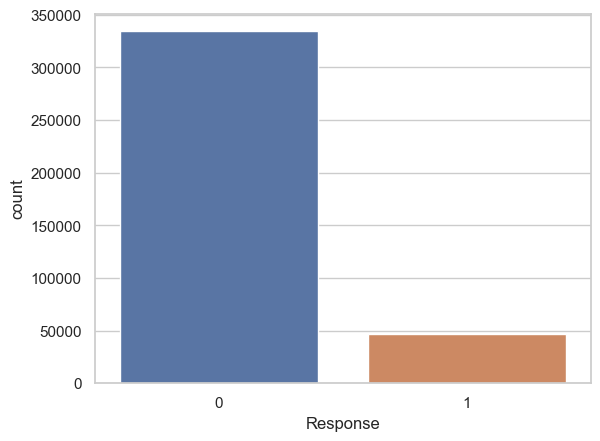

In [11]:
sns.countplot(x='Response',data=train)

In [12]:
train.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

## Age Distribution

<Axes: xlabel='Age', ylabel='Density'>

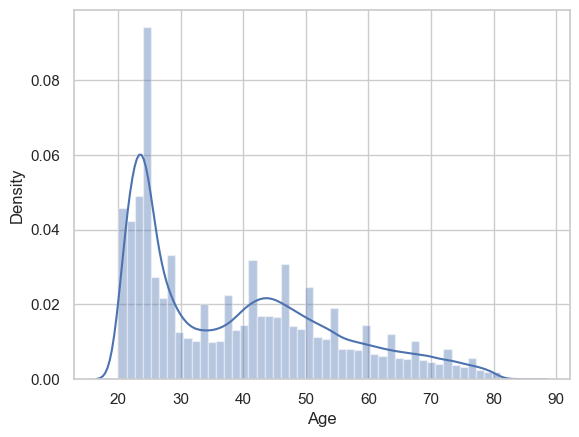

In [13]:
sns.distplot(train.Age)

<Axes: ylabel='Age'>

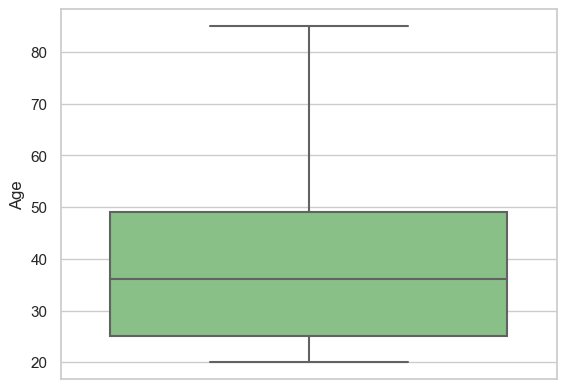

In [14]:
sns.boxplot(y = 'Age', data = train,palette='Accent')

## Age Vs Annual premium

<Axes: xlabel='Age', ylabel='Annual_Premium'>

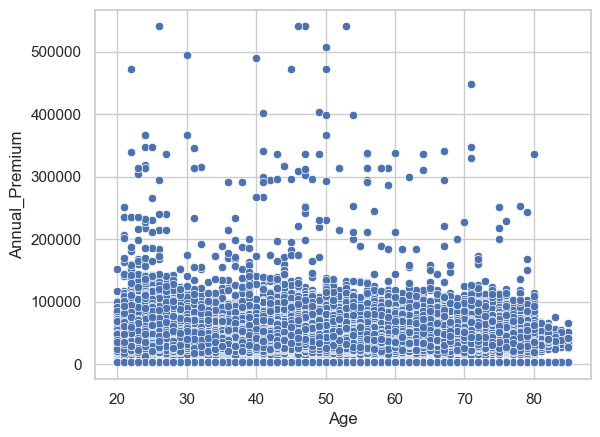

In [15]:
sns.scatterplot(x=train['Age'],y=train['Annual_Premium'])

## Gender and Response

<Axes: xlabel='Gender', ylabel='count'>

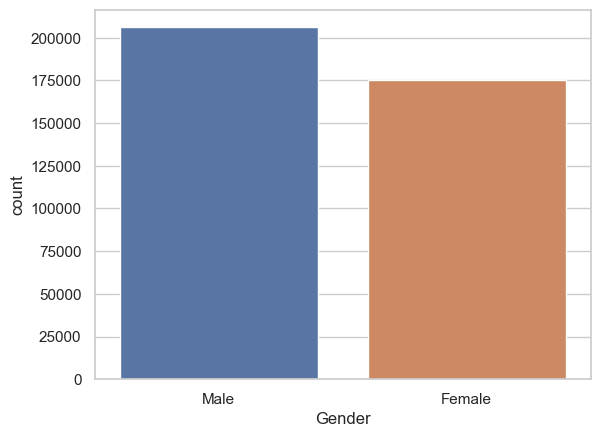

In [16]:
sns.countplot(x='Gender',data=train)

In [17]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

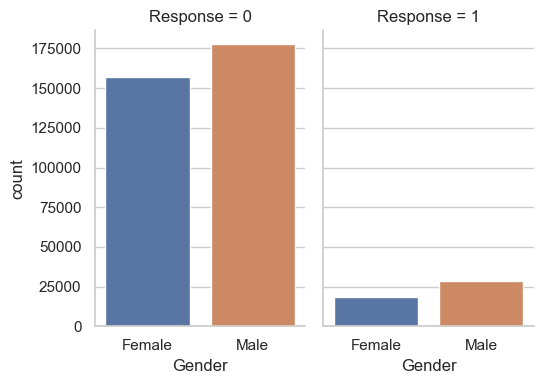

In [18]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

## Driving license by Gender

In [19]:
df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [20]:
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


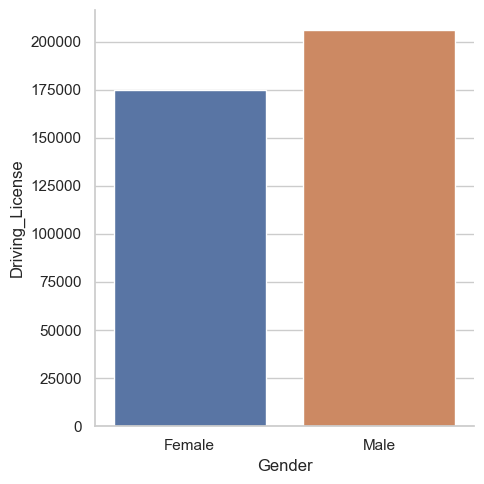

In [21]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

## Customers having Vehicle insurance already

<Axes: xlabel='Previously_Insured', ylabel='count'>

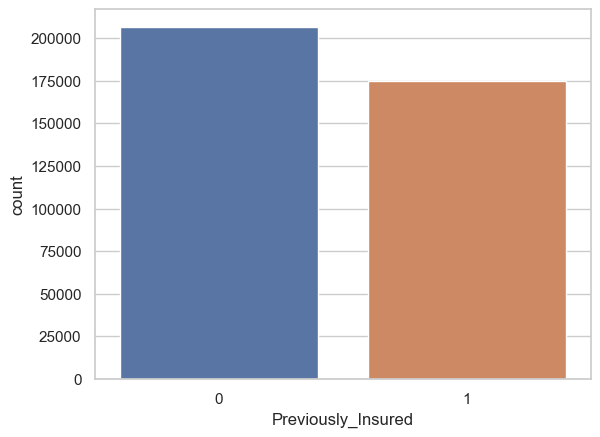

In [22]:
sns.countplot(x='Previously_Insured',data=train)

## Vehicle Age

<Axes: xlabel='Vehicle_Age', ylabel='count'>

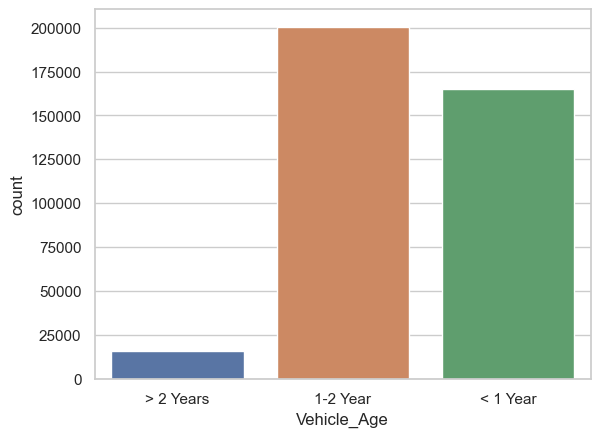

In [23]:
sns.countplot(x='Vehicle_Age',data=train)

## Response and Vehicle age

In [24]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


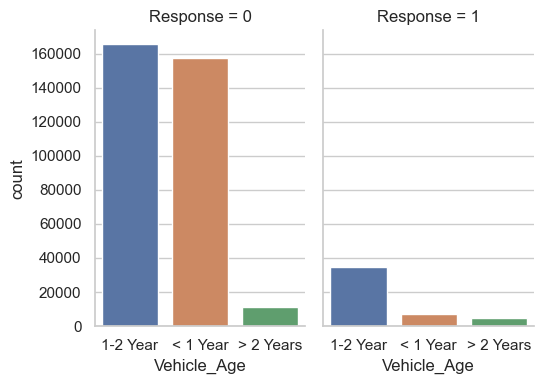

In [25]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

## Customers having damaged vehicle

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

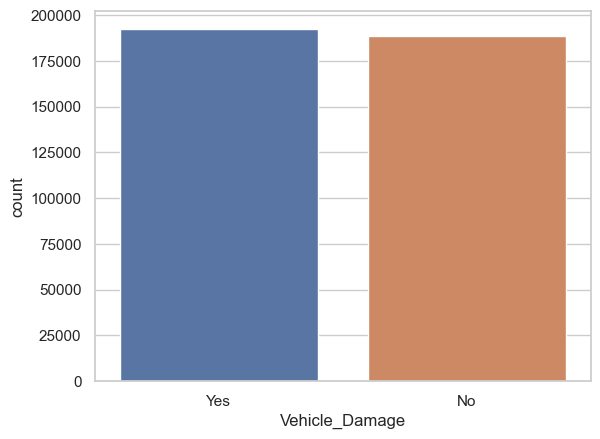

In [26]:
sns.countplot(x='Vehicle_Damage',data=train)

## Damage Vehicle and Response

In [27]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

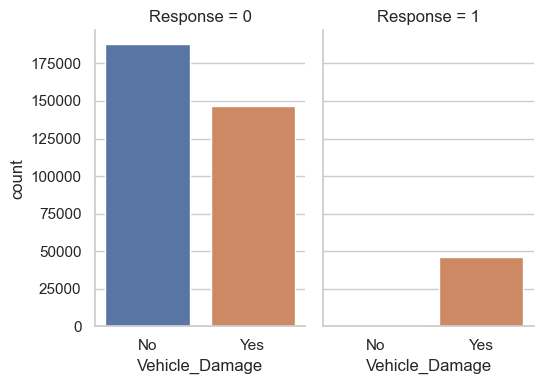

In [28]:
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

## Annual Premium Distribution

<Axes: xlabel='Annual_Premium', ylabel='Density'>

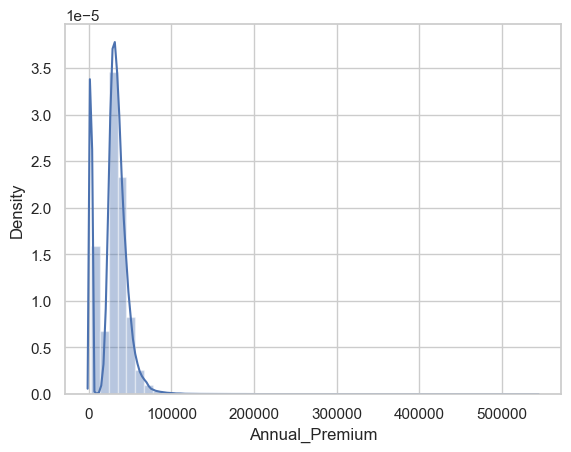

In [29]:
sns.distplot(train.Annual_Premium)

<Axes: ylabel='Annual_Premium'>

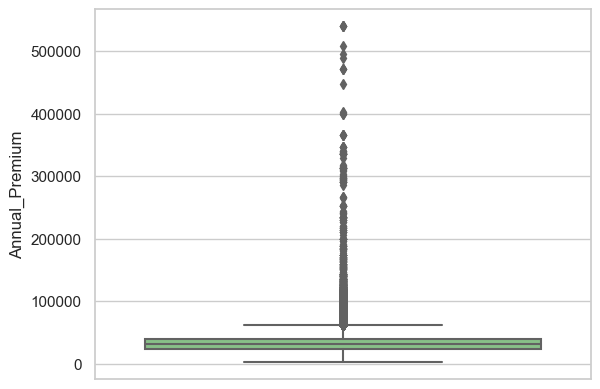

In [30]:
sns.boxplot(y = 'Annual_Premium', data = train,palette='Accent')

## Vintage
Number of Days, Customer has been associated with the company

<Axes: xlabel='Vintage', ylabel='Density'>

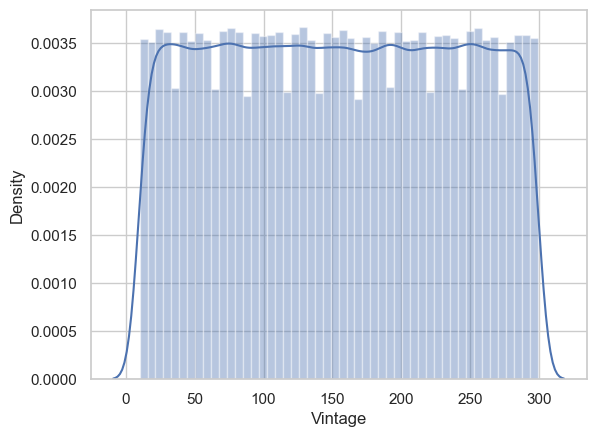

In [31]:
sns.distplot(train.Vintage)

# Data Preprocessing

In [32]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [33]:
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [34]:
train=pd.get_dummies(train,drop_first=True)

In [35]:
train=train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year']=train['Vehicle_Age_lt_1_Year'].astype('int')
train['Vehicle_Age_gt_2_Years']=train['Vehicle_Age_gt_2_Years'].astype('int')
train['Vehicle_Damage_Yes']=train['Vehicle_Damage_Yes'].astype('int')

In [36]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])


mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])

In [37]:
train=train.drop('id',axis=1)

In [38]:
for column in cat_feat:
    train[column] = train[column].astype('str')

In [39]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,2.267815,1,26.0,1,0.051234,26.0,-0.792954,0,0,0,0
381105,1,-0.568774,1,37.0,1,0.069551,152.0,-0.279037,0,1,0,0
381106,1,-1.148985,1,30.0,1,0.060439,160.0,0.079509,0,1,0,0
381107,0,1.881007,1,14.0,0,0.078110,124.0,-0.960275,0,0,1,1


In [40]:
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test=pd.get_dummies(test,drop_first=True)
test=test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test['Vehicle_Age_lt_1_Year']=test['Vehicle_Age_lt_1_Year'].astype('int')
test['Vehicle_Age_gt_2_Years']=test['Vehicle_Age_gt_2_Years'].astype('int')
test['Vehicle_Damage_Yes']=test['Vehicle_Damage_Yes'].astype('int')

In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
test[num_feat] = ss.fit_transform(test[num_feat])


mm = MinMaxScaler()
test[['Annual_Premium']] = mm.fit_transform(test[['Annual_Premium']])

In [42]:
for column in cat_feat:
    test[column] = test[column].astype('str')

In [43]:
from sklearn.model_selection import train_test_split

train_target=train['Response']
train=train.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [44]:
id=test.id

In [45]:
test=test.drop('id',axis=1)

In [46]:
 x_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_lt_1_Year', 'Vehicle_Age_gt_2_Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

# Data Modelling and Evaluation

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

## Random Forest Classifier

In [48]:
x_train.dtypes

Gender                     object
Age                       float64
Driving_License            object
Region_Code                object
Previously_Insured         object
Annual_Premium            float64
Policy_Sales_Channel       object
Vintage                   float64
Vehicle_Age_lt_1_Year      object
Vehicle_Age_gt_2_Years     object
Vehicle_Damage_Yes         object
dtype: object

In [ ]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


## Save model

In [ ]:
filename = 'rf_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = 'rf_model.sav'

In [ ]:
rf_load = pickle.load(open(filename, 'rb'))

## Evaluate model 

In [57]:
y_pred=model.predict(x_test)

In [58]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



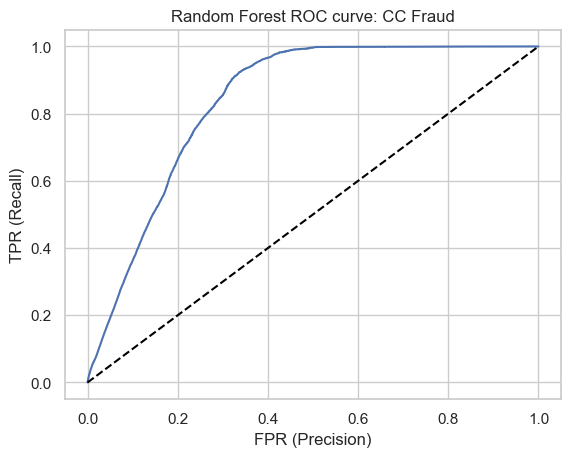

Area under curve (AUC):  0.8383054238625136


In [81]:
y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [82]:
a=roc_auc_score(y_test, y_score)
a

0.8383054238625136

## Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtree = DecisionTreeClassifier()

In [51]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
predictions = dtree.predict(x_test)

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     83603
           1       0.29      0.31      0.30     11675

    accuracy                           0.82     95278
   macro avg       0.60      0.60      0.60     95278
weighted avg       0.83      0.82      0.83     95278



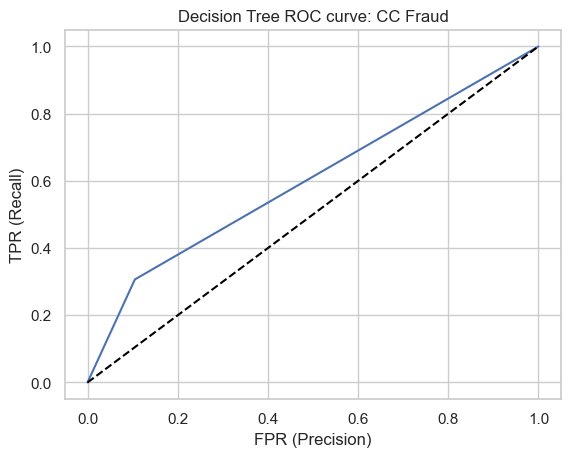

Area under curve (AUC):  0.6007980651698898


In [54]:
y_score = dtree.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('Decision Tree ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [55]:
b=roc_auc_score(y_test, y_score)
b

0.6007980651698898

## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [74]:
predictions = logmodel.predict(x_test)

In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.11      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.49      0.50      0.47     95278
weighted avg       0.78      0.88      0.82     95278



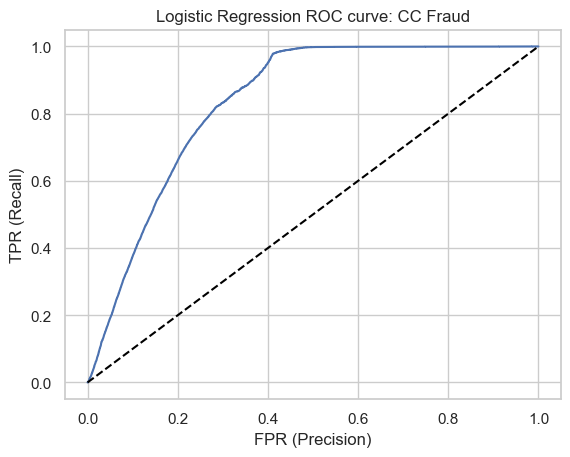

Area under curve (AUC):  0.8341095174473646


In [86]:
y_score = logmodel.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('Logistic Regression ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [87]:
c=roc_auc_score(y_test, y_score)
c

0.8341095174473646

## XGBOOST Classifier

In [88]:
for column in cat_feat:
    x_train[column] = x_train[column].astype('float')
    x_test[column] = x_test[column].astype('float')

In [89]:
space={ 'max_depth': hp.quniform("max_depth", 3,18,1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 300,
        'seed': 0
      }

In [90]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train, y_train), ( x_test, y_test)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_test)
    y_score = model.predict_proba(x_test)[:,1]
    accuracy = accuracy_score(y_test, pred>0.5)
    Roc_Auc_Score = roc_auc_score(y_test, y_score)
    print ("ROC-AUC Score:",Roc_Auc_Score)
    print ("SCORE:", accuracy)
    return {'loss': -Roc_Auc_Score, 'status': STATUS_OK }

In [91]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [92]:
trials = Trials()

In [93]:
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

ROC-AUC Score:                                         
0.8383054238625136                                     
SCORE:                                                 
0.8774323558429018                                     
ROC-AUC Score:                                                                    
0.8383054238625136                                                                
SCORE:                                                                            
0.8774638426499297                                                                
ROC-AUC Score:                                                                    
0.8383054238625136                                                                
SCORE:                                                                            
0.8774638426499297                                                                
ROC-AUC Score:                                                                    
0.8383054238625136           

ROC-AUC Score:                                                                     
0.8383054238625136                                                                 
SCORE:                                                                             
0.8774638426499297                                                                 
ROC-AUC Score:                                                                     
0.8383054238625136                                                                 
SCORE:                                                                             
0.8774428514452445                                                                 
ROC-AUC Score:                                                                     
0.8383054238625136                                                                 
SCORE:                                                                             
0.8774638426499297                                                          

SCORE:                                                                             
0.8774638426499297                                                                 
ROC-AUC Score:                                                                     
0.8383054238625136                                                                 
SCORE:                                                                             
0.877453347047587                                                                  
ROC-AUC Score:                                                                     
0.8383054238625136                                                                 
SCORE:                                                                             
0.8774218602405592                                                                 
100%|██████████| 100/100 [22:19<00:00, 13.39s/trial, best loss: -0.8383054238625136]


In [94]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.8076861195205487, 'gamma': 6.611596138154226, 'max_depth': 9.0, 'min_child_weight': 1.0, 'reg_alpha': 42.0, 'reg_lambda': 0.7516880959410307}


In [95]:
xgb_model=xgb.XGBClassifier(n_estimators = space['n_estimators'],
                            max_depth = 5 ,
                            gamma = 2.9750465254798586,
                            min_child_weight = 3.0,
                            reg_alpha = 167.0,
                            reg_lambda = 0.835442642743726,
                            colsample_bytree = 0.8877317740078994)

In [96]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8877317740078994, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=2.9750465254798586,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [97]:
filename = 'xgboost_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

## ROC Curve & AUC of XG boost classifier

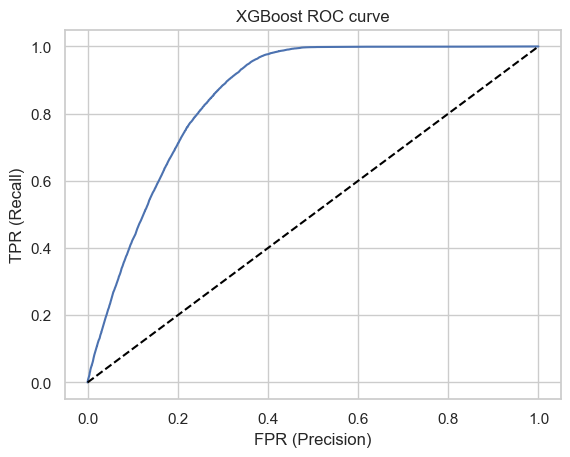

Area under curve (AUC):  0.8534534981416837


In [99]:
y_score = xgb_model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [100]:
e=roc_auc_score(y_test, y_score)
e

0.8534534981416837

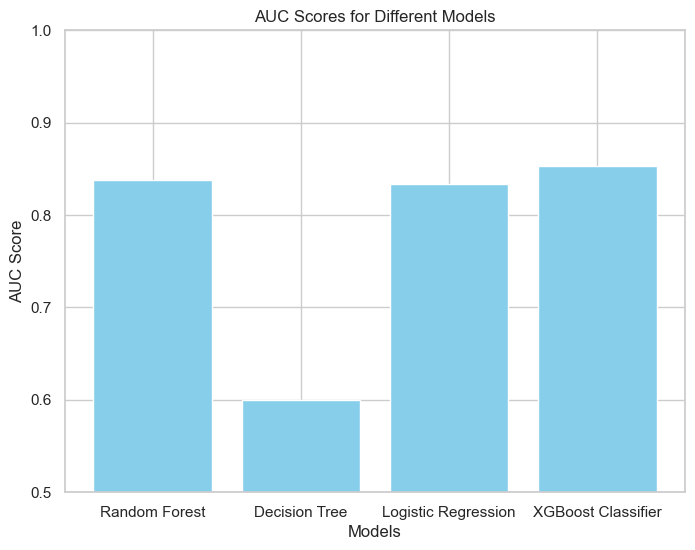

In [131]:
AUC_Score = [0.8383054238625136, 0.5998398841306706, 0.8341095174473646, 0.8534534981416837]
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost Classifier']

plt.figure(figsize=(8, 6))
plt.bar(models, AUC_Score, color='skyblue')
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('AUC Scores for Different Models')
plt.ylim(0.5, 1.0) 
plt.show()